# Study of the results of the NN for for one smaller circle     

This notebook studies the results of the NN trained to predict PI from the smaller circle dataset. 
   1. We compare the regression results between a classifier trained on real PIs and trained on predicted PIs.
   2. we look at the p-values of the Kolmogorov-Smirnov test on each pixels,
   

---

In [22]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from IPython.display import SVG

import gudhi as gd
import gudhi.representations

from tqdm import tqdm
from time import time

from scipy.stats import ks_2samp
from sklearn.metrics import r2_score


### Load the NN

2021-08-03 15:55:01.515478: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-03 15:55:01.580999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-03 15:55:01.581662: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2021-08-03 15:55:01.581721: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-03 15:55:01.582204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No suc

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 2)]          0         
_________________________________________________________________
fully_connected2 (FullyConne (None, 500, 30)           60        
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 500, 30)           0         
_________________________________________________________________
dense (Dense)                (None, 500, 20)           620       
_________________________________________________________________
dense_1 (Dense)              (None, 500, 10)           210       
_________________________________________________________________
lambda (Lambda)              (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550   

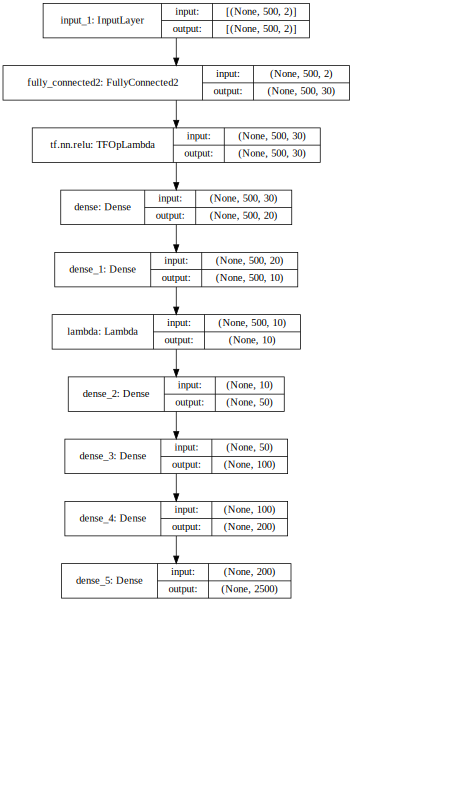

In [23]:
model_PI = tf.keras.models.load_model('../Trained_NN/model_smaller_circles/')
model_PI.summary()

## Regression 

We first load the data that will be used as training and testing data for the regression.

In [24]:
data = np.load('data/PI_data_smaller_circle_reg.npz')

#data = np.load('PI_data_1000_dynamical_alpha.npz')

r_train_gudhi = data["r_train"]
PI_train_gudhi = data["PI_train"]
r_test_gudhi = data["r_test"]
PI_test_gudhi = data["PI_test"]

In [25]:
N_sets_train = r_train_gudhi.shape[0]
N_sets_test = r_test_gudhi.shape[0]
PI_size = int(np.sqrt(PI_train_gudhi.shape[1]))

In [26]:
print("N_sets_train : ", N_sets_train)
print("N_sets_test : ", N_sets_test)
print("PI_size : ", PI_size)

N_sets_train :  1000
N_sets_test :  100
PI_size :  50


We want to compare the regression results between the true PIs and the predited PIs. For that, we create 2 models : ```model_reg_NN``` will be trained with the PI computed by the NN and ```model_reg_gudhi``` will be trained with the PI computed by Gudhi. We will then compare their accuracy on new data.

In [6]:
def create_model():
    inputs = tf.keras.Input(shape=(PI_size * PI_size))

    x = tf.keras.layers.Dense(100, activation='relu')(inputs)

    x = tf.keras.layers.Dense(50, activation='relu')(x)

    outputs = tf.keras.layers.Dense(1)(x)

    model_reg = tf.keras.Model(inputs=inputs, outputs=outputs)
    model_reg.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
    return model_reg

In [7]:
model_reg_NN = create_model()
model_reg_gudhi = create_model()

model_reg_NN.summary()


#SVG(
#    tf.keras.utils.model_to_dot(model_classif,
#                                show_shapes=True).create(prog='dot',
#                                                         format='svg'))
                                                        
#tf.keras.utils.plot_model(model_classif,
#                          to_file='Résultats/Résultats 2/model_classif_multip.pdf',
#                          show_shapes=True,
#                          rankdir='LR')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2500)]            0         
_________________________________________________________________
dense (Dense)                (None, 100)               250100    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 255,201
Trainable params: 255,201
Non-trainable params: 0
_________________________________________________________________


### Fit the regression model ```model_reg_gudhi```

In [8]:
history_gudhi = model_reg_gudhi.fit(PI_train_gudhi,
                            r_train_gudhi,
                            epochs=100,
                            validation_data=(PI_test_gudhi, r_test_gudhi))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.2823 - mean_squared_error: 0.2823 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 8.0960e-04 - val_mean_squared_error: 8.0960e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2672e-04 - mean_squared_error: 4.2672e-04 - val_loss: 4.4896e-04 - val_mean_squared_error: 4.4896e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4874e-04 - mean_squared_error: 2.4874e-04 - val_loss: 3.1794e-04 - val_mean_squared_error: 3.1794e-04
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4804e-04 - mean_squared_error: 2.4804e-04 - val_loss: 1.9848e-04 - val_mean_squa

Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3123e-05 - mean_squared_error: 5.3123e-05 - val_loss: 1.5701e-04 - val_mean_squared_error: 1.5701e-04
Epoch 49/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0485e-04 - mean_squared_error: 2.0485e-04 - val_loss: 2.5929e-04 - val_mean_squared_error: 2.5929e-04
Epoch 50/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6648e-04 - mean_squared_error: 2.6648e-04 - val_loss: 1.9974e-04 - val_mean_squared_error: 1.9974e-04
Epoch 51/100
32/32 [==============================] - 0s 3ms/step - loss: 1.8743e-04 - mean_squared_error: 1.8743e-04 - val_loss: 1.8864e-04 - val_mean_squared_error: 1.8864e-04
Epoch 52/100
32/32 [==============================] - 0s 3ms/step - loss: 7.8314e-05 - mean_squared_error: 7.8314e-05 - val_loss: 4.8371e-05 - val_mean_squared_error: 4.8371e-05
Epoch 53/100
32/32 [==============================] - 0s 3ms/step - loss: 6.9954e-05 - mean_squared_error: 6.9

We compute the $R^2$ coefficient and the MSE score of the regression trained on real PIs. 

In [28]:
r_pred_gudhi = model_reg_gudhi.predict(PI_test_gudhi)
test_loss_g, test_acc_g = model_reg_gudhi.evaluate(PI_test_gudhi,  r_test_gudhi, verbose=2)
r2_g = r2_score(r_test_gudhi,r_pred_gudhi)
print("R2 = ",r2_g)

4/4 - 0s - loss: 2.7103e-15 - mean_squared_error: 2.7103e-15


We plot the regression trained on true PIs

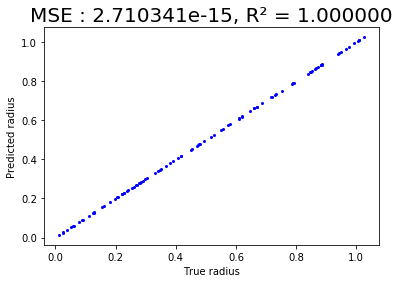

In [30]:
plt.plot(r_test_gudhi,r_pred_gudhi,'bo',markersize=2)
plt.xlabel("True radius")
plt.ylabel("Predicted radius")
plt.title("MSE : {:e}, R² = {:2f}".format(test_acc_g,r2_g),fontsize=20)
plt.savefig("Résultats/Résultats 3/regression_diameter_circle_gudhi.pdf")

 ### Generate data for the training of ```model_reg_NN```  

In [27]:
def create_circle(N_points, r, x_0, y_0):
    X = []
    for i in range(N_points): #On fait un cercle
        theta = np.random.uniform()*2*np.pi
        X.append([(r*np.cos(theta))+x_0,(r*np.sin(theta)+y_0)])
    return np.array(X)

In [38]:
N_points = 500
data_train_NN = np.zeros((N_sets_train, N_points, 2))
r_train_NN = np.zeros((N_sets_train,))

for i in tqdm(range(N_sets_train), desc='Generating dataset : '):
    r = np.random.random()
    data_train_NN[i] = create_circle(N_points, r,0,0) 
    r_train_NN[i] = r

Generating dataset : 100%|█████████████████| 1000/1000 [00:02<00:00, 374.91it/s]


In [41]:
PI_train_NN = model_PI.predict(data_train_NN)

2021-08-03 15:58:18.618582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-03 15:58:18.638904: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


In [13]:
N_points = 500
data_test_NN = np.zeros((N_sets_test, N_points, 2))
r_test_NN = np.zeros((N_sets_test,))

for i in tqdm(range(N_sets_test), desc='Generating dataset : '):
    r = np.random.random()
    data_test_NN[i] = create_circle(N_points, r,0,0) 
    r_test_NN[i] = r

Generating dataset : 100%|██████████| 100/100 [00:00<00:00, 338.66it/s]


In [14]:
PI_test_NN = model_PI.predict(data_test_NN)

### Fit the regression model ```model_reg_NN```

In [15]:
history_NN = model_reg_NN.fit(PI_train_NN,
                            r_train_NN,
                            epochs=50,
                            validation_data=(PI_test_NN, r_test_NN))

Epoch 1/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 9.7111e-04 - val_mean_squared_error: 9.7111e-04
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 9.4019e-04 - mean_squared_error: 9.4019e-04 - val_loss: 7.1302e-04 - val_mean_squared_error: 7.1302e-04
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 7.7801e-04 - mean_squared_error: 7.7801e-04 - val_loss: 5.8328e-04 - val_mean_squared_error: 5.8328e-04
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 6.5067e-04 - mean_squared_error: 6.5067e-04 - val_loss: 4.7468e-04 - val_mean_squared_error: 4.7468e-04
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 5.4115e-04 - mean_squared_error: 5.4115e-04 - val_loss: 3.7553e-04 - val

In [16]:
test_loss, test_acc = model_reg_NN.evaluate(PI_test_NN,  r_test_NN, verbose=2)

print('\nMSE:', test_acc)

4/4 - 0s - loss: 8.9224e-05 - mean_squared_error: 8.9224e-05

MSE: 8.92237076186575e-05


### We generated test data for ```model_reg_NN ```

In [17]:
data_test = np.zeros((100,N_points,2))
r_test = np.zeros((100,))

for i in tqdm(range(100), desc='Generating dataset : '):
    r = np.random.random()
    data_test[i] = create_circle(N_points, r,0,0) 
    r_test[i] = r

Generating dataset : 100%|██████████| 100/100 [00:00<00:00, 327.95it/s]


In [21]:
PI_test_NN = model_PI.predict(data_test)

We compute the $R^2$ coefficient and the MSE score of the regression trained on predicted PIs. 

In [22]:
r_predicted_NN = model_reg_NN.predict(PI_test_NN)
test_loss, test_acc = model_reg_NN.evaluate(PI_test_NN,  r_test, verbose=2)
r2 = r2_score(r_test,r_predicted_NN)
print("r2 = ", r2)

4/4 - 0s - loss: 9.7981e-05 - mean_squared_error: 9.7981e-05


We plot the regression trained on predicted PIs.

Text(0.5, 1.0, 'MSE : 9.798066e-05, R² = 0.998819')

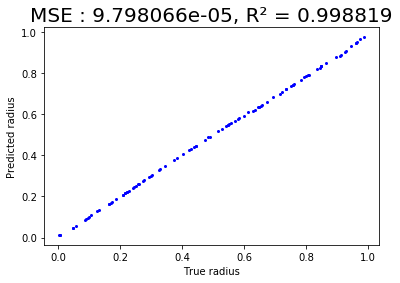

In [23]:
plt.plot(r_test,r_predicted_NN,'bo',markersize=2)
plt.xlabel("True radius")
plt.ylabel("Predicted radius")
plt.title("MSE : {:e}, R² = {:2f}".format(test_acc,r2),fontsize=20)

#plt.savefig("Résultats/Résultats 3/regression_diameter_circle.pdf")

In [23]:
np.max(np.abs(r_predicted_NN.flatten()-r_test))

0.011792451414098792

## Kolmogorov-Smirnov test 

We test if the PI computed with the NN and the PI computed with Gudhi have the same pixel distribution. 
$$(H_0) : \mathcal{D}_{\text{NN}} = \mathcal{D}_{\text{Gudhi}}$$
We use for that the Kolmogorov-Smirnov test on each pixels to see the pixels that don't have the same distribution

We start by generating new data to do the KS test

In [9]:
PI_train_NN = model_PI.predict(data_train_NN)

2021-07-23 12:16:00.814309: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-23 12:16:00.878804: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


In [10]:
PI_gudhi = np.zeros((len(data_train_NN), PI_size * PI_size))

starttimeG = time()
for i in range(len(data_train_NN)):
    rcX = gd.AlphaComplex(points=data_train_NN[i]).create_simplex_tree()
    dgmX = rcX.persistence()

    PI = gd.representations.PersistenceImage(bandwidth=1e-1,
                                             weight=lambda x: x[1]**(1),
                                             resolution=[PI_size, PI_size], im_range=[0, 1, 0, 1])
    pi = PI.fit_transform([rcX.persistence_intervals_in_dimension(1)])
    PI_gudhi[i] = pi[0]
timeG = time() - starttimeG
PI_gudhi /= np.max(PI_gudhi)
print('Time taken by Gudhi = {} seconds'.format(timeG))

Time taken by Gudhi = 50.30605626106262 seconds


In [11]:
p_value_ks = np.zeros(PI_train_NN[0].shape)
for i in range(len(p_value_ks)):
    p_value_ks[i] = ks_2samp(PI_train_NN[:, i], PI_gudhi[:, i])[0]

Text(0.5, 1.0, 'Histogram of the p-values for the KS test on each pixels')

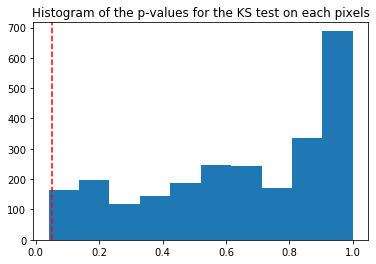

In [12]:
plt.hist(p_value_ks)
plt.vlines(0.05, 0, 800, linestyle='--', colors='red')
plt.ylim(0, 717)
plt.title("Histogram of the p-values for the KS test on each pixels")
#plt.savefig("Résultats/Résultats 4/hist_p_value_test_ks_noisy_circles.pdf")

Some pixels have a p-value $\leq$ 0.05 so we can rejet $H_0$ for some pixels, but for a verry small amount.

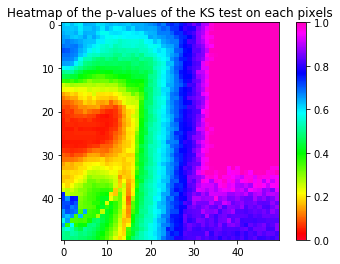

In [20]:
plt.imshow(np.flip(np.reshape(p_value_ks, [PI_size, PI_size]), 0),
           vmin=0,
           vmax=1,
           cmap='gist_rainbow')
plt.colorbar()
plt.title("Heatmap of the p-values of the KS test on each pixels")
plt.savefig("Rapports/Rapport_PRe/Images/heatmap_p_value_test_ks_smaller_circles.pdf")

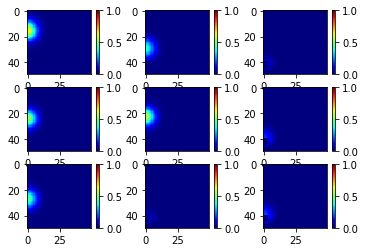

In [40]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.flip(np.reshape(PI_train_NN[i], [PI_size, PI_size]), 0),
               vmin=0,
               vmax=1,
               cmap='jet')
    plt.colorbar()

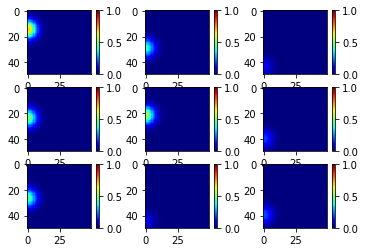

In [41]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.flip(np.reshape(PI_gudhi[i], [PI_size, PI_size]), 0),
               vmin=0,
               vmax=1,
               cmap='jet')
    plt.colorbar()

In [47]:
(np.square(PI_train_NN - PI_gudhi)).mean(axis=None)

9.035410451200591e-05